<a href="https://colab.research.google.com/github/Manu-Gr/DB-SCAN---Assignment---Crime-Dataset/blob/main/DBSCAN_Assignment_Crime_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**DBSCAN - Assignment - Crime Dataset**

In [ ]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Read the dataset

crime_D = pd.read_csv('crime_data.csv')
crime_D

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime_D1= crime_D.rename({'Unnamed: 0':'City'},axis=1)
crime_D1

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime_D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
# Normalize the data using standard scalar fit transform to dataset

scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime_D1.iloc[:,1:])
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## **Model Building**

In [ ]:
# DBSCAN Clustering
dbscan4=DBSCAN(eps=1,min_samples=4)
dbscan4.fit(scaled_crime_df)

DBSCAN(eps=1, min_samples=4)

In [ ]:
#Noisy samples are given the label -1.
dbscan4.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Adding the cluster column to dataset
crime_D1['clusters']=dbscan4.labels_
crime_D1

,City,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [ ]:
crime_D1.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


In [ ]:
crime_D1.groupby('clusters').agg(['count']).reset_index()

,clusters,City,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,-1,18,18,18,18,18
1,0,4,4,4,4,4
2,1,28,28,28,28,28


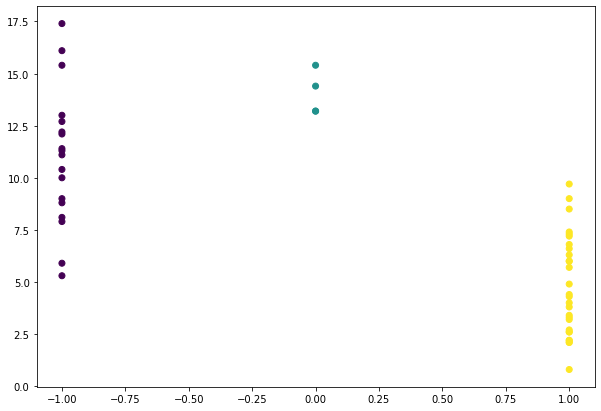

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_D1['clusters'],crime_D1['Murder'], c=dbscan4.labels_) 

### **Model Building**

###**2nd Iteration** 

In [ ]:
# DBSCAN Clustering
dbscan1=DBSCAN(eps=1.25,min_samples=4)
dbscan1.fit(scaled_crime_df)

DBSCAN(eps=1.25, min_samples=4)

In [ ]:
#Noisy samples are given the label -1.
dbscan1.labels_

array([ 0, -1,  1,  1, -1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Adding the cluster column to dataset
crime_D1['clusters1']=dbscan1.labels_
crime_D1

,City,Murder,Assault,UrbanPop,Rape,clusters,clusters1
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,-1,-1
2,Arizona,8.1,294,80,31.0,-1,1
3,Arkansas,8.8,190,50,19.5,-1,1
4,California,9.0,276,91,40.6,-1,-1
5,Colorado,7.9,204,78,38.7,-1,1
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,-1,1
8,Florida,15.4,335,80,31.9,-1,-1
9,Georgia,17.4,211,60,25.8,-1,0


In [ ]:
crime_D1.groupby('clusters1').agg(['count']).reset_index()

,clusters1,City,Murder,Assault,UrbanPop,Rape,clusters
,,count,count,count,count,count,count
0,-1,4,4,4,4,4,4
1,0,7,7,7,7,7,7
2,1,39,39,39,39,39,39


In [ ]:
crime_D1.groupby('clusters1').agg(['mean']).reset_index()

,clusters1,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,-1,11.650000,281.500000,75.000000,40.750000,-1.000000
1,0,14.671429,251.285714,54.285714,21.685714,-0.428571
2,1,6.156410,144.948718,66.589744,19.148718,0.435897


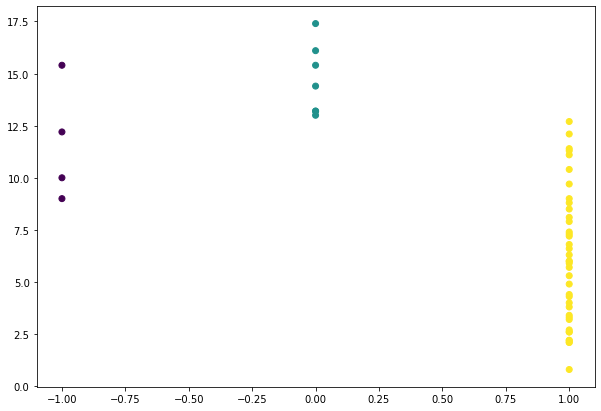

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_D1['clusters1'],crime_D1['Murder'], c=dbscan1.labels_) 